In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.graph_objects as go
from plotly.offline import plot

# for offline plotting

from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [18]:
tesla = pd.read_csv("D:tesla.csv")

In [19]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [20]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [21]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [22]:
print(f'Dataframe contains the data between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max()-tesla.Date.min()).days} days')

Dataframe contains the data between 2010-06-29 00:00:00 2017-03-17 00:00:00
Total Days = 2453 days


In [23]:
tesla.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


<Axes: >

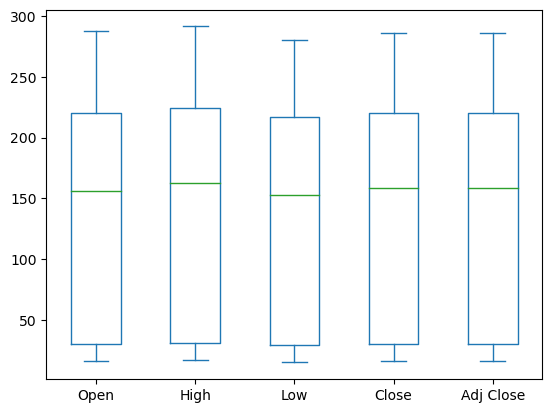

In [24]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
# setting the layout for the plot
layout = go.Layout(
    title='Stock Price of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_date = [go.Scatter(x=tesla['Date'], y=tesla['Close'], mode='lines', name='Tesla')]
plot = go.Figure(data=tesla_date, layout=layout)

plot.show()


: 

In [28]:
# Building the regression model
from sklearn.model_selection import train_test_split

# for preproccessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [29]:
# split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
x_train ,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 101)

In [31]:
# Feature Scaling 
scaler = StandardScaler().fit(x_train)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# creating a linear model
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [35]:
# plot the actual and predicted values for train dataset
trace0 = go.Scatter(
x= x_train.T[0],
y = y_train,
mode = 'markers',
name = 'Actual'
)
trace1 = go.Scatter(
x= x_train.T[0],
y = lm.predict(x_train),
mode = 'lines',
name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot1 = go.Figure(data=tesla_data, layout=layout)

plot1.show()


In [37]:
from sklearn.metrics import r2_score, mean_squared_error as mse

# Assuming y_train, y_test, x_train, x_test, and lm (your model) are already defined

# Calculate scores
train_r2 = r2_score(y_train, lm.predict(x_train))
test_r2 = r2_score(y_test, lm.predict(x_test))
train_mse = mse(y_train, lm.predict(x_train))
test_mse = mse(y_test, lm.predict(x_test))

# Create the formatted string
scores = f'''
{'Metrics'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{str(train_r2).center(20)}{str(test_r2).center(20)}
{'MSE'.ljust(10)}{str(train_mse).center(20)}{str(test_mse).center(20)}
'''

print(scores)



Metrics          Train                Test        
r2_score   0.792990040984633   0.7956409009085726 
MSE        1836.9223967033354  1823.8784763131882 



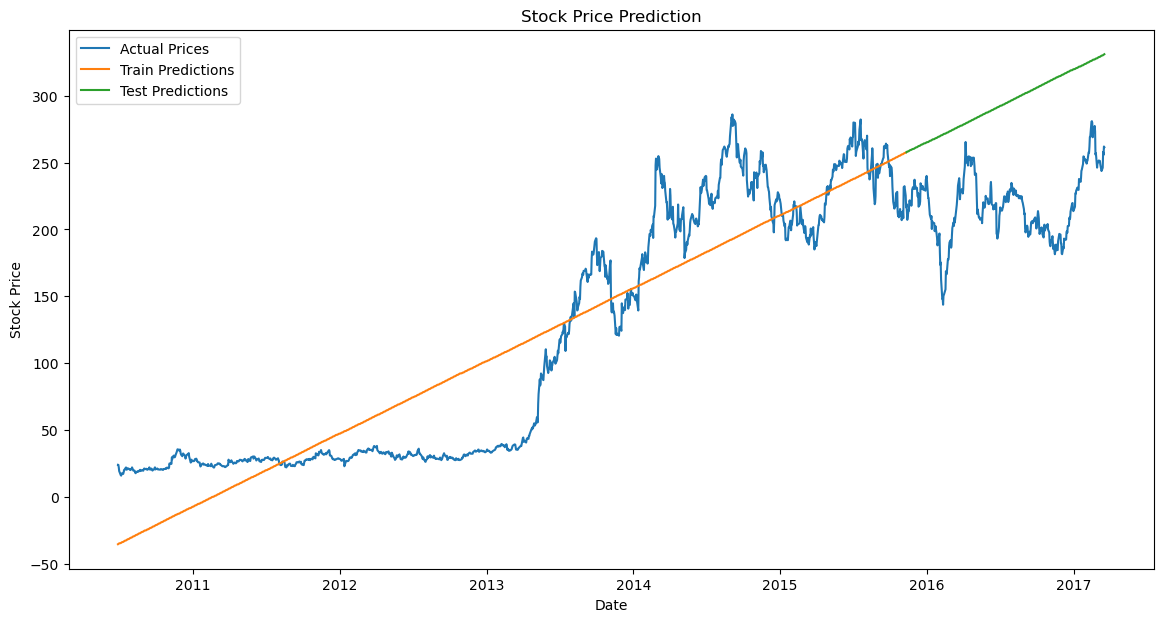

In [42]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Prices')
plt.plot(df.index[:len(y_train)], y_train_pred, label='Train Predictions')
plt.plot(df.index[len(y_train):], y_test_pred, label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()
